# Forward mechanic-acoustic coupling

In [41]:
from sys import path
from hdf5_tools import get_step_values, get_result, get_centroids, get_coordinates
import h5py

In [42]:
%matplotlib inline 
# must be in a seperate cell above the following commands

import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler
color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
mpl.rc('figure',figsize=[2.7,1.6]) # figure size in inch
mpl.rc('figure',dpi=200) # inline dpi (=display size in browser)
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)
import numpy as np

## Results analysis

This file analyzes the results of the testsuite example of the forward(weak) mechanic-acoustic coupling in a harmonic simulation.            

A steel cube fixed in y and z directions and constrained by a normal stiffness in x direction was excited by a volumetric force of total value 1N in the x direction. 
The cube movement excited acoustic waves in an adjacent air channel. Both regions are coupled by a common interface and the mechanical velocity resulting from the first simulation step is used as an input for the acoustics. In the tested setup the cube has dimensions 0.1m x 0.1m x 0.1m and the channel has a length of 1m. The waves are damped by a PML at the end of the channel. 

The tested frequency range was 1000Hz - 3000Hz in 100Hz steps. The normal stiffnes of the constrained surface has been set in a way to result in an eigennfrequency at 2000Hz. 
The ouput results are the acoustic pressure and acosutic velocity in the channel, mechanical displacement of the cube, mechanical velocity and normal acoustic velocity at the coupling surface. The same set up has been tested using the direct(strong) coupling and the results of the both simulations have been compared. The files for the direct coupling simulation are also provided in the testsuite example. 

##### Warning!
To limit the runtime (for efficient testing) the frequency resolution has been reduced to just three values (1,2 and 3kHz) in the current input file. It can be set back to the values used in this post-processing notebook by uncommenting the appropriate section in xml input. Running the post-processing with reduced frequency resolution will affect the quality of the plots showing the velocity at the coupling interface.

### Reading the data

In [68]:
#Reading in the result files of the weak coupling simulation
h5 = 'results_hdf5/wc_full.cfs' #result file name(file path) for the forward(weak) coupling simulation, change if necessary

U = get_result(h5,'mechDisplacement',step='all',multistep=1)  #mechanical displacements
V = get_result(h5,'mechVelocity', region='V_cube', step='all',multistep=1) #mechanical velocity
f1 = get_step_values(h5)[0] #frequencies for mechanical sequence step

Vn = get_result(h5,'acouNormalVelocity',step='all',multistep=2) #acoustic normal velocity at the coupling surface
P = get_result(h5,'acouPressure',region='V_air',multistep=2,step='all') #acoustic pressure in the channel
Va = get_result(h5,'acouVelocity',region='V_air',multistep=2,step='all') #acosutic velocity in the channel
f2 = get_step_values(h5)[1] #frequencies for acosutic sequence step

In [61]:
#Coordinates and centroids in the channel
X = get_coordinates(h5,'V_air') #node coordinates in the acoustic region
C = get_centroids(h5,'V_air') #centroids in the acoustic region

# where are the coordinates y>0 and z>0
Ip = np.argwhere(np.logical_and(X[:,1] > 0,X[:,2]>0)).ravel()
# sort for x
Is = np.argsort(X[Ip,0])
Ip = Ip[Is]

# where are the centroids y>0 and z>0
Ic = np.argwhere(np.logical_and(C[:,1] > 0,C[:,2]>0)).ravel()
# sort for x
Is = np.argsort(C[Ic,0])
Ic = Ic[Is]

In [69]:
#Reading in the result files of the direct coupling simulation
h5d = 'results_hdf5/dc_full.cfs' #result file name(file path) for the direct(strong) coupling simulation, change if necessary

Ud = get_result(h5d,'mechDisplacement',step='all',multistep=1)# mechanical displacement
Vd = get_result(h5d,'mechVelocity',step='all',multistep=1)# mechanical velocity
f1d = get_step_values(h5d)[0] # frequencies 

Vnd = get_result(h5d,'acouNormalVelocity',step='all',multistep=1) #acoustic normal velocity at the coupling surface
Pd = get_result(h5d,'acouPressure',region='V_air',multistep=1,step='all') #acoustic pressure
Vad = get_result(h5d,'acouVelocity',region='V_air',multistep=1,step='all') #acoustic velocity

#the coordinates and centroids are the same as in the weak coupling case

In [72]:
#get correct indices for plotting 1, 2 and 3kHz
plot_freq = np.array([1000., 2000., 3000.])
ids = np.array([])
for i in plot_freq:
    ids = np.append(ids, (np.argwhere(abs(f1-i)<1e-4)))
ids = ids.astype(int)

### Pressure in the channel

#### Weak coupling

First, the acoustic pressure amplitude and absolute value are plotted over the channel length for 1kHz, 2kHz and 3kHz, that is for the lowest and the highest tested frequencies and for the expected eigenfrequency. We can observe the much higher values for the 2kHz than for the 1kHz and 3kHz, what indicates that it is in fact an eigenfrequency.

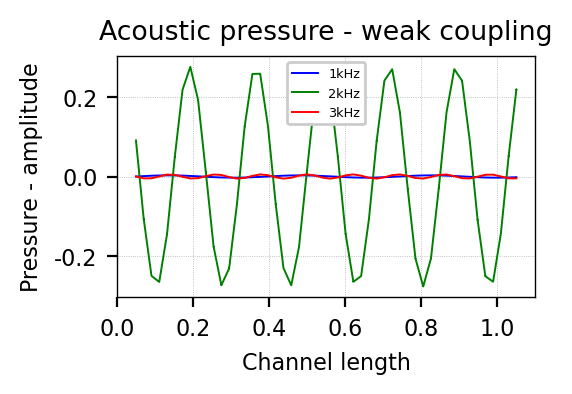

In [73]:
fig,ax = plt.subplots()
ax.plot( X[Ip,0], (P[ids[0],Ip]).real.T,color='b', label = '1kHz' )
ax.plot( X[Ip,0], (P[ids[1],Ip]).real.T,color='g', label = '2kHz' ) 
ax.plot( X[Ip,0], (P[ids[2],Ip]).real.T,color='r', label = '3kHz' ) 
plt.title('Acoustic pressure - weak coupling')
plt.xlabel('Channel length')
plt.ylabel('Pressure - amplitude')
plt.legend(fontsize = 'xx-small')
plt.show()


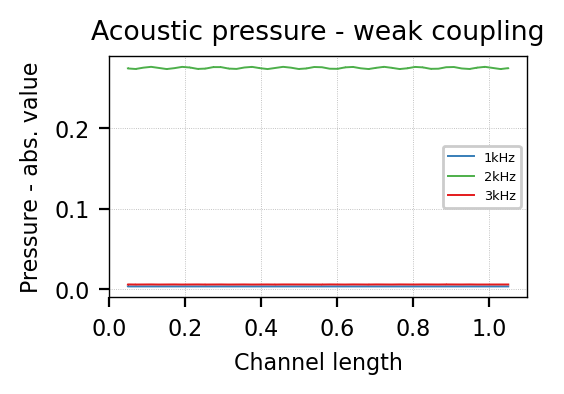

In [74]:
fig,ax = plt.subplots()
l, = ax.plot( X[Ip,0], np.abs(P[ids[0],Ip]).T, label='1kHz' )
l, = ax.plot( X[Ip,0], np.abs(P[ids[1],Ip]).T, label='2kHz' )
l, = ax.plot( X[Ip,0], np.abs(P[ids[2],Ip]).T, label='3kHz' ) 
plt.title('Acoustic pressure - weak coupling')
plt.xlabel('Channel length')
plt.ylabel('Pressure - abs. value')
plt.legend(fontsize = 'xx-small')
plt.show()

#### Comparison with the direct coupling

As we can observe in the plots below, the values of the pressure over the channel lenght fit almost perfectly for the forward and direct coupling. This suggests that in the tested setup the mechanical vibrations are not significantly affected by the surrounding air and the back coupling effect between the acoustic and mechanical fields can be neglected.

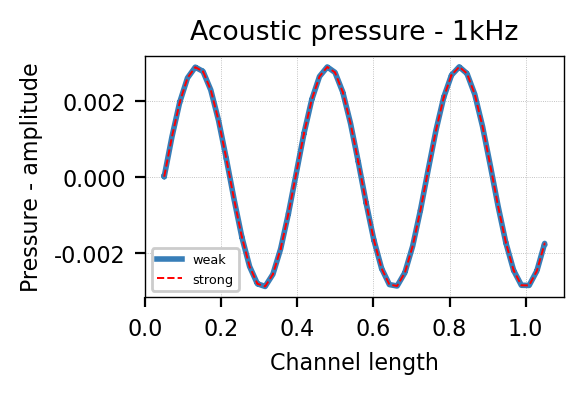

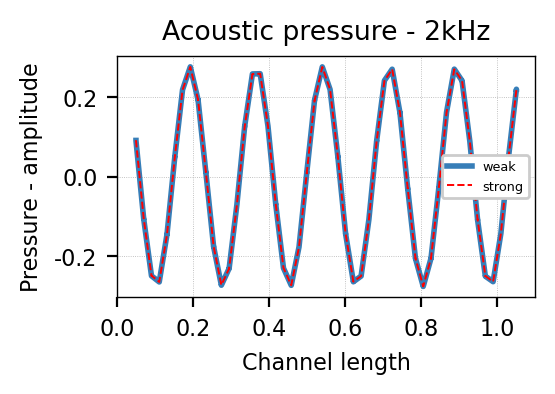

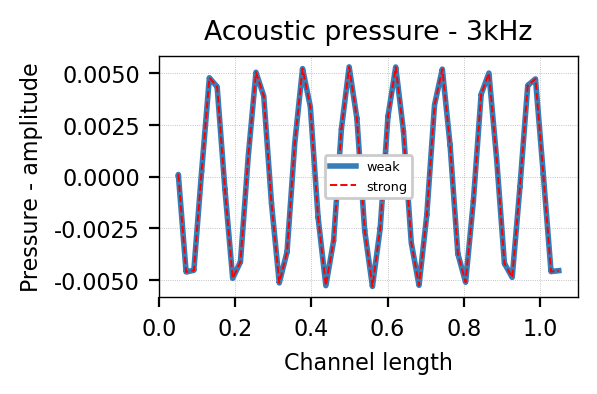

In [75]:
for i in range(3):
    fig,ax = plt.subplots()
    ax.plot( X[Ip,0], (P[ids[i],Ip]).real.T,lw = 2, label = 'weak' ) 
    ax.plot( X[Ip,0], (Pd[ids[i],Ip]).real.T,'--', color='r', label = 'strong' ) 
    plt.title('Acoustic pressure - '+str(i+1)+'kHz')
    plt.xlabel('Channel length')
    plt.ylabel('Pressure - amplitude')
    plt.legend(fontsize = 'xx-small')
    plt.show()


### Acoustic velocity in the channel

#### Weak coupling

Next, the acoustic velocity amplitude and absolute value are plotted over the channel length for the same frequencies. The plots correspond to the pressure plots and show much higher acousitc velocity for 2kHz.

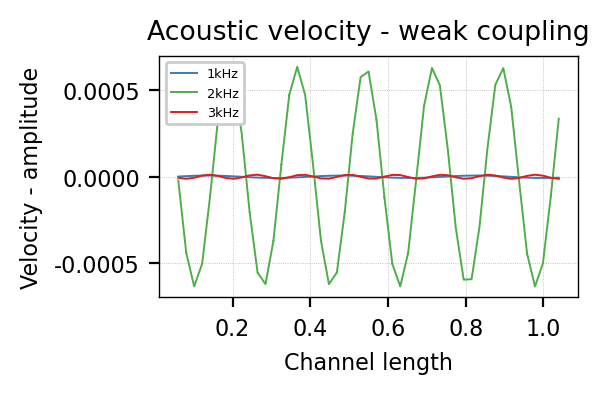

In [76]:
fig,ax = plt.subplots()
ax.plot( C[Ic,0], (Va[ids[0],Ic,0]).real.T, label = '1kHz' )
ax.plot( C[Ic,0], (Va[ids[1],Ic,0]).real.T, label = '2kHz')
ax.plot( C[Ic,0], (Va[ids[2],Ic,0]).real.T, label = '3kHz')
plt.title('Acoustic velocity - weak coupling')
plt.xlabel('Channel length')
plt.ylabel('Velocity - amplitude')
plt.legend(fontsize = 'xx-small')
plt.show()


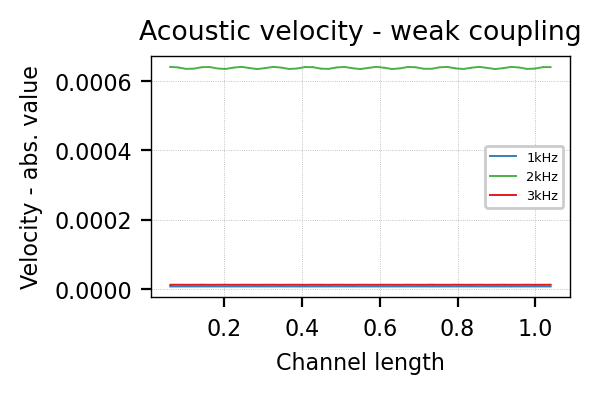

In [77]:
fig,ax = plt.subplots()
l, = ax.plot( C[Ic,0], np.abs(Va[ids[0],Ic,0]).T, label = '1kHz' )
l, = ax.plot( C[Ic,0], np.abs(Va[ids[1],Ic,0]).T, label = '2kHz' )
l, = ax.plot( C[Ic,0], np.abs(Va[ids[2],Ic,0]).T, label = '3kHz' )
plt.title('Acoustic velocity - weak coupling')
plt.xlabel('Channel length')
plt.ylabel('Velocity - abs. value')
plt.legend(fontsize = 'xx-small')
plt.show()

#### Comparison with the direct coupling

Also here we see a perfect match between the results of the forward and direct coupling simulations.

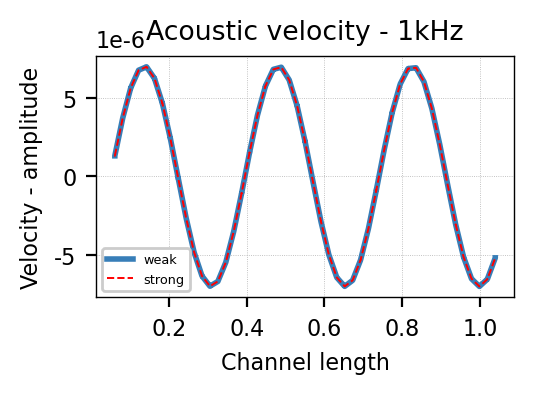

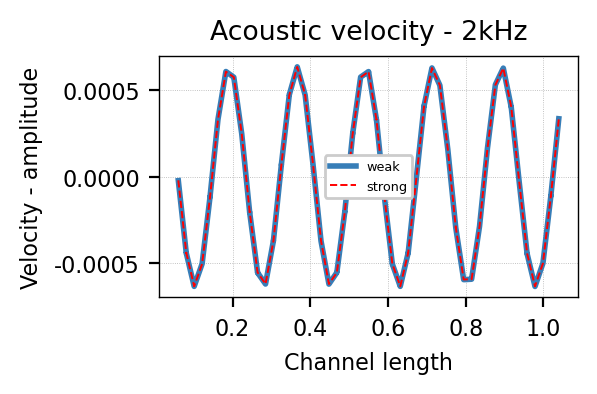

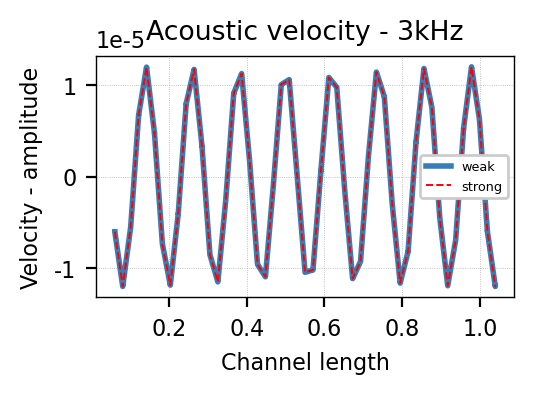

In [78]:
for i in range(3):
    fig,ax = plt.subplots()
    ax.plot( C[Ic,0], (Va[ids[i],Ic,0]).real.T, lw=2, label = 'weak' )
    ax.plot( C[Ic,0], (Vad[ids[i],Ic,0]).real.T, '--', color='r', label = 'strong' )
    plt.title('Acoustic velocity - '+str(i+1)+'kHz')
    plt.xlabel('Channel length')
    plt.ylabel('Velocity - amplitude')
    plt.legend(fontsize = 'xx-small')
    plt.show()


### Mechanical velocity and normal acoustic velocity at the coupling interface

Here we investigate the behaviour at the coupling interface by comparing the mechanical velocity with the normal acoustic velocity. We plot the amplitude and phase of both values over the whole tested frequency range. Since the resulting mechanical velocity is independent of the coupling we plot it only once, and compare the normal aocustic velocities between the forward and direct cases. 

We can see that the amplitudes of the mechanical velocity and both normal acoustic velocities match very well. The plot of the phase shows the same values for the acoustic normal velocity in both couplings, however, those values differ visibly from the mechanical velocity phase. This can be explained by the fact that the mechanical velocity is a nodal result, whereas the normal acoustic velocity is a surface element result. 

We also plot the real and imaginary part of the mechanical and normal acousitc velocities.

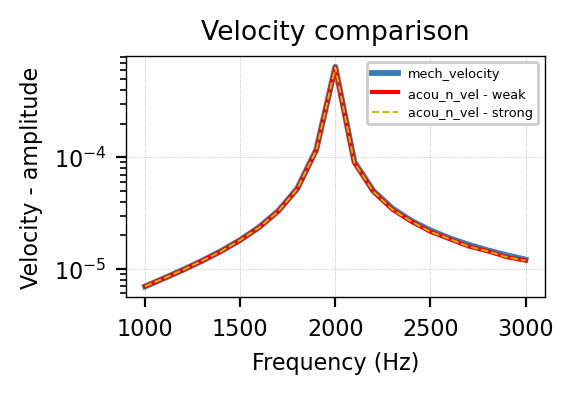

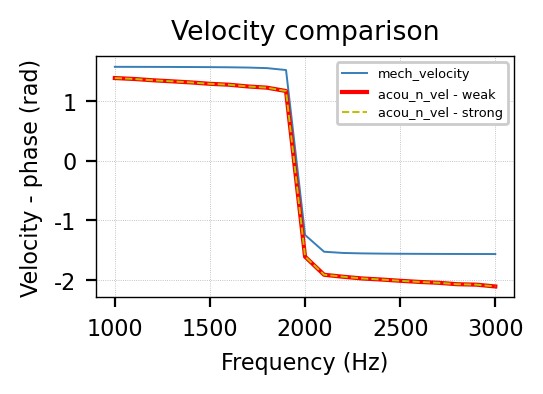

In [79]:
fig,ax = plt.subplots()
ax.semilogy(f1,np.abs(np.mean(V[:,:,0],axis=-1)),lw = 2.1, ms=1, label='mech_velocity')
ax.semilogy(f2,np.abs(np.mean(Vn,axis=-1)), color = 'r', lw=1.5,label = 'acou_n_vel - weak')
ax.semilogy(f1d,np.abs(np.mean(Vnd,axis=-1)),'--',color='y', label = 'acou_n_vel - strong')
plt.title('Velocity comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Velocity - amplitude')
plt.legend(fontsize = 'xx-small')
fig,ax = plt.subplots()
ax.plot(f1,np.angle(np.mean(V[:,:,0],axis=-1)), label='mech_velocity' )
ax.plot(f2,np.angle(np.mean(-Vn,axis=-1)),color = 'r', lw=1.5, label='acou_n_vel - weak')
ax.plot(f1d,np.angle(np.mean(-Vnd,axis=-1)),'--',color='y', label='acou_n_vel - strong')
plt.title('Velocity comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Velocity - phase (rad)')
plt.legend(fontsize = 'xx-small')
plt.show()

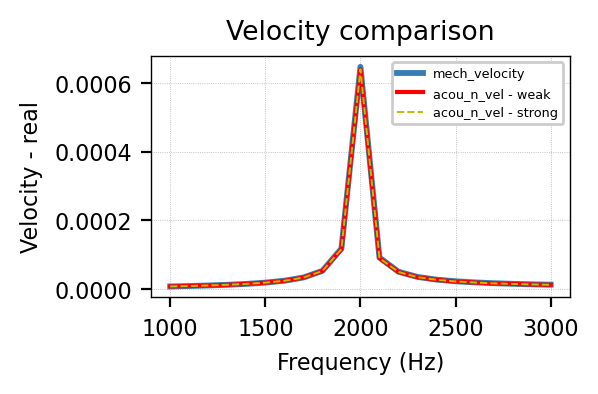

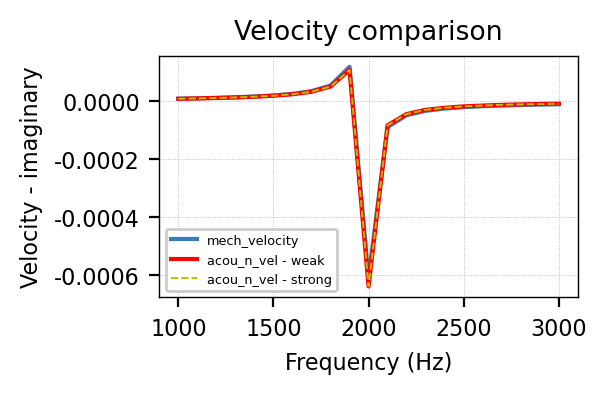

In [80]:
fig,ax = plt.subplots()
ax.plot(f1,np.abs((np.mean(V[:,:,0],axis=-1))).real,lw=2.1,ms=1,label = 'mech_velocity')
ax.plot(f2,np.abs(np.mean(Vn,axis=-1)).real, color = 'r', lw=1.5,label = 'acou_n_vel - weak' )
ax.plot(f1d,np.abs(np.mean(Vnd,axis=-1)).real,'--',color='y', label = 'acou_n_vel - strong')
plt.title('Velocity comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Velocity - real')
plt.legend(fontsize = 'xx-small')
fig,ax = plt.subplots()
ax.plot(f1,(np.mean(V[:,:,0],axis=-1)).imag,lw=1.5,ms=1,label = 'mech_velocity')
ax.plot(f2,(np.mean(-Vn,axis=-1)).imag, color = 'r', lw=1.5,label = 'acou_n_vel - weak')
ax.plot(f1d,(np.mean(-Vnd,axis=-1)).imag,'--',color='y', label = 'acou_n_vel - strong')
plt.title('Velocity comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Velocity - imaginary')
plt.legend(fontsize = 'xx-small')
plt.show()